# Network Intrusion Detection using NSL-KDD Dataset

A Jupyter notebook for Network Intrusion Detection using the NSL-KDD dataset, including data preprocessing, feature selection, and model training/evaluation with translated comments.

## Import Libraries
Import necessary libraries like pandas, numpy, sklearn, etc.

In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix # Added for CM calculation in visualization

## Define Data URLs
Define the URLs for the NSL-KDD training and testing datasets.

In [ ]:
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'



## Load Data and Define Columns
Define column names and load the training and testing datasets from the URLs into pandas DataFrames. Print the dimensions of the loaded datasets.

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


## Display Initial Data
Display the first 10 rows of the training DataFrame to inspect the data.

In [ ]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


## Examine Label Distribution
Print the value counts for the 'label' column in both the training and testing DataFrames to understand the distribution of attack types.

In [ ]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

## Visualize Label Distribution (Train/Test)
Use libraries like Matplotlib or Seaborn to create bar charts showing the distribution of the 'label' column (attack types vs. normal) in both the training (df) and testing (df_test) DataFrames before remapping.

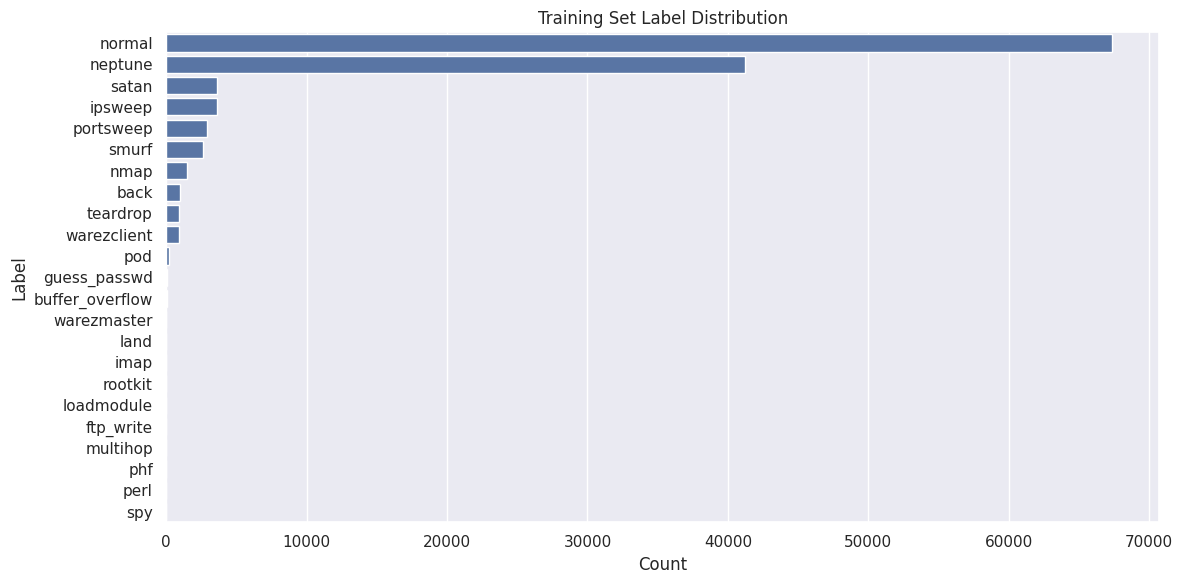

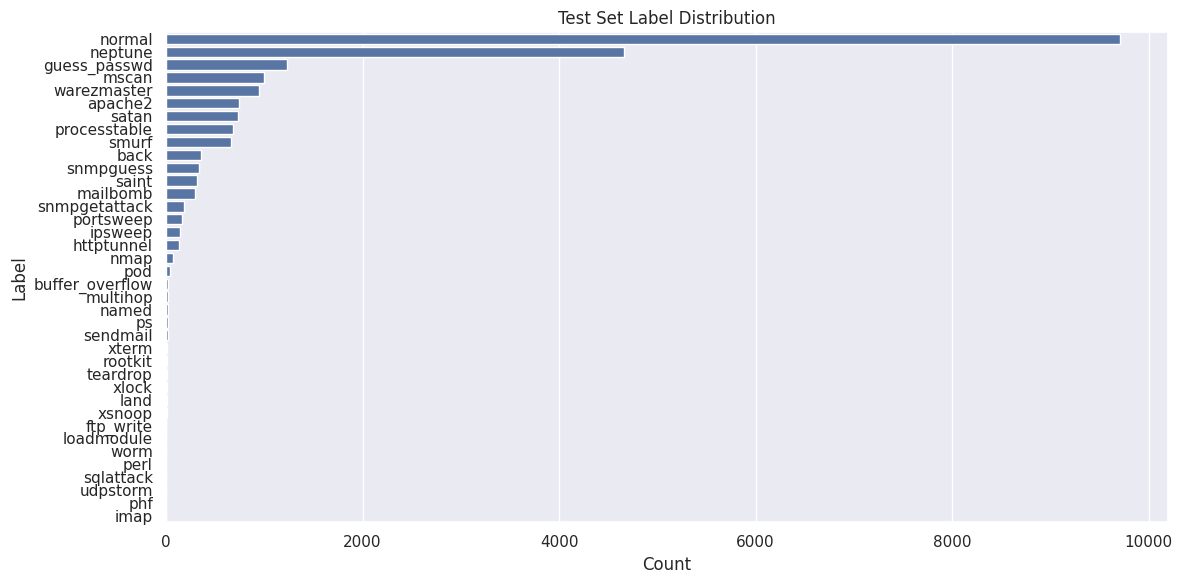

In [ ]:
# Set plot style
sns.set(style="darkgrid")

# Plotting Training Set Label Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order = df['label'].value_counts().index)
plt.title('Training Set Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

# Plotting Test Set Label Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df_test, order = df_test['label'].value_counts().index)
plt.title('Test Set Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

**Step 1: Data preprocessing:**

One-Hot-Encoding is used to convert all categorical features into binary features. The requirement for One-Hot-Encoding is that the input to this transformer must be an integer matrix representing the values taken by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to a possible value. It is assumed that the input features take values in the range [0, n_values]. Therefore, the features must first be transformed with LabelEncoder to convert each category into a number.

## Identify Categorical Features (Training Set)
Iterate through the columns of the training DataFrame, identify object-type (categorical) columns, and print the number of unique categories for each. Includes a comment: '# columns are categorical, not yet binary: protocol_type (column 2), service (column 3), flag (column 4).'

In [ ]:
# columns are categorical, not yet binary: protocol_type (column 2), service (column 3), flag (column 4)

print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


## Identify Categorical Features (Test Set)
Iterate through the columns of the test DataFrame, identify object-type (categorical) columns, and print the number of unique categories for each.

In [ ]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


**LabelEncoder**

**Insert categorical features into a 2D numpy array**

## Prepare Categorical Data for Encoding
Import LabelEncoder and OneHotEncoder. Select the categorical columns ('protocol_type', 'service', 'flag') into new DataFrames for both training and testing sets.

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


## Generate One-Hot Encoding Column Names
Generate unique column names for the one-hot encoded features based on the unique values in 'protocol_type', 'service', and 'flag' columns for both training and testing sets. Includes comments like '# protocol type', '# service', '# flag', '# put together', '# do it for test set'.

In [ ]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

**Transform categorical features into numbers using LabelEncoder()**

## Apply Label Encoding
Apply LabelEncoder to transform the categorical string values into numerical representations for both training and testing sets. Includes comment: '# test set'.

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


**One-Hot-Encoding**

## Apply One-Hot Encoding
Apply OneHotEncoder to the label-encoded data to create binary features for each category. Convert the sparse matrix output to a pandas DataFrame with the generated column names. Includes comment: '# test set'.

In [ ]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Add missing columns in the Test set**

## Identify Missing Columns Between Train/Test
Find the 'service' categories present in the training set but missing in the test set after one-hot encoding.

In [ ]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_http_2784',
 'service_red_i',
 'service_urh_i',
 'service_http_8001',
 'service_harvest']

## Add Missing Columns to Test Set
Add the missing 'service' columns (identified in the previous step) to the one-hot encoded test DataFrame and initialize them with zeros.

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


**Add new numerical columns to the main dataframe**

## Combine Encoded Features and Drop Originals
Join the one-hot encoded DataFrames back to the original training and testing DataFrames. Drop the original categorical columns ('flag', 'protocol_type', 'service'). Includes comment: '# test data'.

In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


 The dataset was divided into separate datasets for each attack category. Attack labels were renamed for each. 0=Normal, 1=DoS, 2=Probe, 3=R2L, 4=U2R. In the new datasets, the label column was replaced with the new values.

 DoS :

 Probe :

 R2L :

 U2R :

## Remap Labels to Numerical Categories
Replace the string labels in the 'label' column with numerical categories (0: Normal, 1: DoS, 2: Probe, 3: R2L, 4: U2R) for both training and testing sets. Includes comments: '# change the label column', '# put the new label column back'.

In [ ]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

<ipython-input-16-e0d9126c3ed8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
<ipython-input-16-e0d9126c3ed8>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm

## Create Attack-Specific DataFrames
Create separate DataFrames for each attack category (DoS, Probe, R2L, U2R) plus Normal, by filtering the main DataFrames based on the remapped numerical labels. Includes comments: '# Filter all rows that have a label value other than its own', '# isin filter function', '#test'.

In [ ]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

# Kendisi dışındaki label değerine sahip tüm satırları filtrele
# Filter all rows that have a label value other than its own
# isin filter function

DoS_df=newdf[newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[newdf['label'].isin(to_drop_U2R)];



#test
DoS_df_test=newdf_test[newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[newdf_test['label'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)

Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


**Step 2: Feature Scaling**

## Split Data into Features (X) and Target (Y) for Each Attack Type
For each attack-specific DataFrame (DoS, Probe, R2L, U2R), separate the features (X) from the target variable (Y - the label column) for both training and testing sets. Includes comments: '# X Features, Y target variables', '# test set'.

In [ ]:
X_DoS = DoS_df.drop('label', axis=1)
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop('label', axis=1)
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop('label', axis=1)
Y_R2L = R2L_df.label

X_U2R = U2R_df.drop('label', axis=1)
Y_U2R = U2R_df.label

# test set
X_DoS_test = DoS_df_test.drop('label', axis=1)
Y_DoS_test = DoS_df_test.label

X_Probe_test = Probe_df_test.drop('label', axis=1)
Y_Probe_test = Probe_df_test.label

X_R2L_test = R2L_df_test.drop('label', axis=1)
Y_R2L_test = R2L_df_test.label

X_U2R_test = U2R_df_test.drop('label', axis=1)
Y_U2R_test = U2R_df_test.label


**Since column names will be deleted at this stage, we save the column names for later use.**

## Store Original Column Names
Store the list of feature column names before scaling, as scaling operations might remove them.

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

## Apply Feature Scaling (StandardScaler)
Apply StandardScaler to scale the feature sets (X) for each attack category (DoS, Probe, R2L, U2R) in both training and testing data. Includes comment: '# test data'.

In [ ]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

**Step 3: Feature Selection:**

---

**Recursive Feature Elimination (RFE) , top 13 features (as a group)**

# Random Forest

## Perform Recursive Feature Elimination (RFE) with RandomForest - DoS
Use RFE with a RandomForestClassifier estimator to select the top 13 features for the DoS dataset. Store the transformed data and the names/indices of the selected columns.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state for reproducibility
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)

rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

## Perform Recursive Feature Elimination (RFE) with RandomForest - Probe
Use RFE with a RandomForestClassifier estimator to select the top 13 features for the Probe dataset. Store the transformed data and the names/indices of the selected columns.

In [ ]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)


## Perform Recursive Feature Elimination (RFE) with RandomForest - R2L
Use RFE with a RandomForestClassifier estimator to select the top 13 features for the R2L dataset. Store the transformed data and the names/indices of the selected columns.

In [ ]:

rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

## Perform Recursive Feature Elimination (RFE) with RandomForest - U2R
Use RFE with a RandomForestClassifier estimator to select the top 13 features for the U2R dataset. Store the transformed data and the names/indices of the selected columns.

In [ ]:


rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

**Summary of features selected by RFE**

## Display Selected Features by RFE
Print the names of the features selected by RFE for each attack category (DoS, Probe, R2L, U2R).

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)


Features selected for DoS: ['src_bytes', 'dst_bytes', 'num_compromised', 'count', 'srv_count', 'same_srv_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'Protocol_type_icmp', 'service_ecr_i', 'flag_SF']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_tcp', 'service_eco_i', 'service_private']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'service_ftp_data']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'root_shell', 'num_file_creations', 'c

## Visualize RFE Selected Features
Create horizontal bar charts to visualize the features selected by RFE for each attack category (DoS, Probe, R2L, U2R).

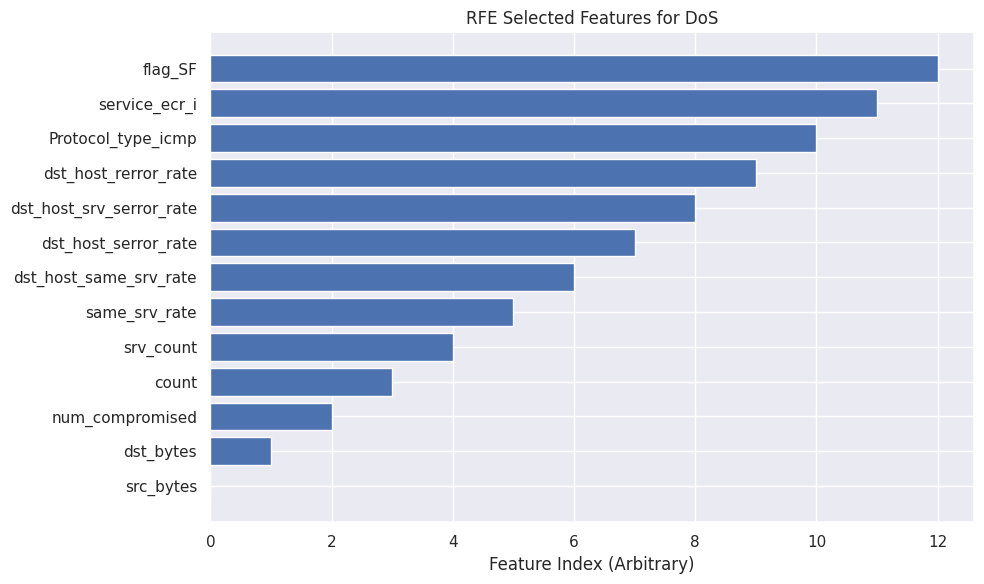

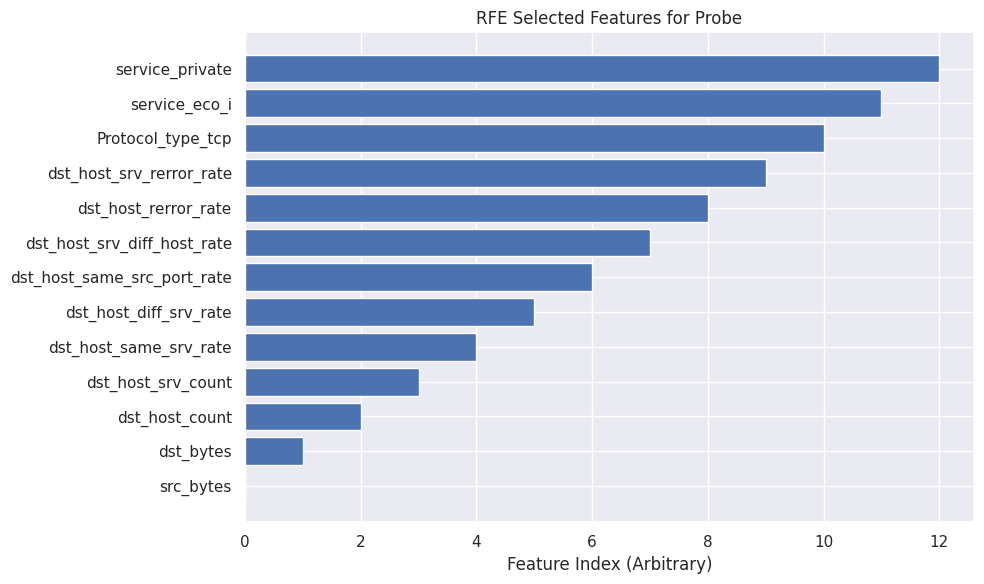

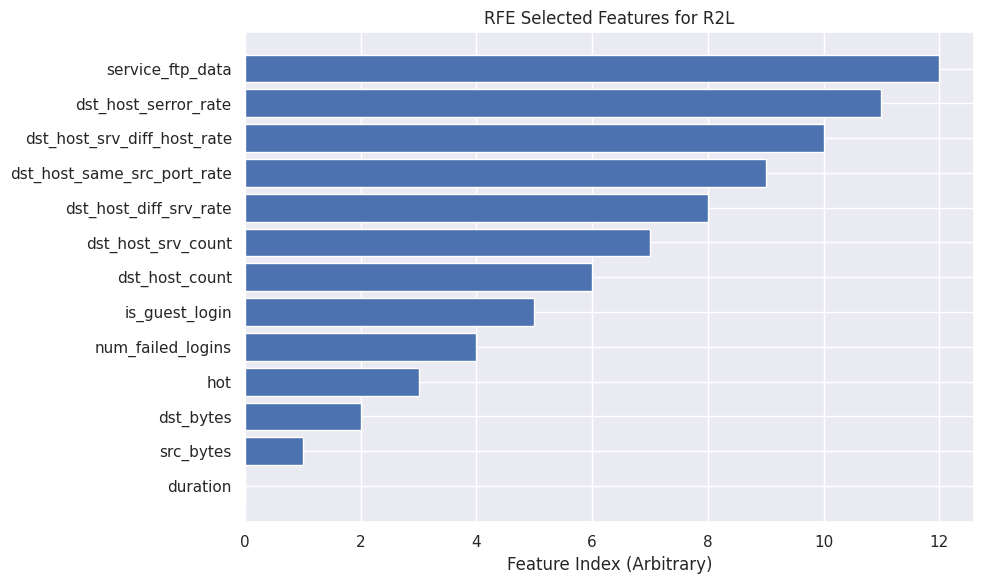

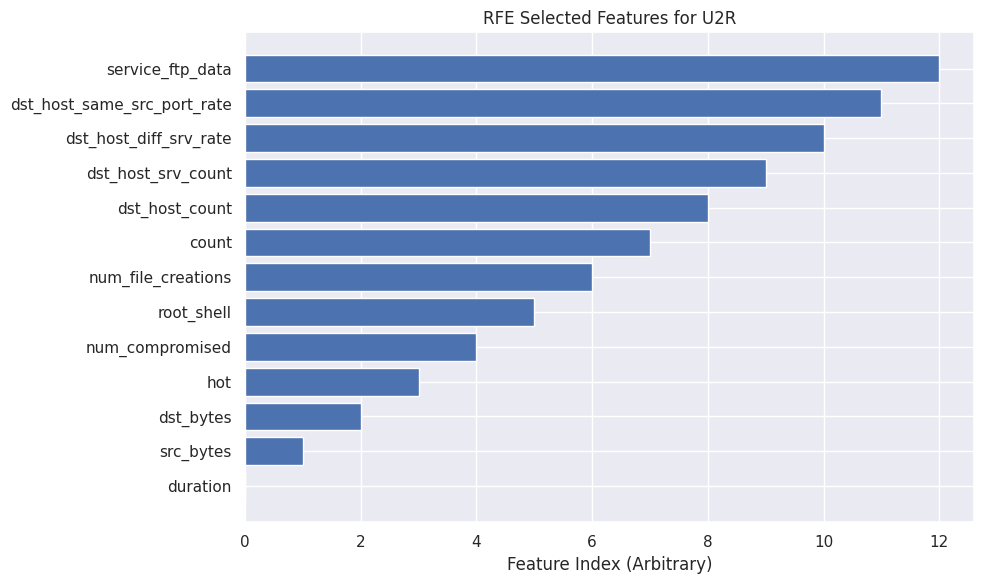

In [ ]:
# Plotting selected features for each category

plt.figure(figsize=(10, 6))
plt.barh(rfecolname_DoS, range(len(rfecolname_DoS)))
plt.title('RFE Selected Features for DoS')
plt.xlabel('Feature Index (Arbitrary)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(rfecolname_Probe, range(len(rfecolname_Probe)))
plt.title('RFE Selected Features for Probe')
plt.xlabel('Feature Index (Arbitrary)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(rfecolname_R2L, range(len(rfecolname_R2L)))
plt.title('RFE Selected Features for R2L')
plt.xlabel('Feature Index (Arbitrary)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(rfecolname_U2R, range(len(rfecolname_U2R)))
plt.title('RFE Selected Features for U2R')
plt.xlabel('Feature Index (Arbitrary)')
plt.tight_layout()
plt.show()

# Note: Feature importance scores are not directly plotted here,
# as the RFE object in the original code doesn't store them easily after fitting multiple times.
# These plots simply list the selected feature names.

## Display Shapes of RFE-Transformed Data
Print the shapes of the RFE-transformed feature sets (X_rfeDoS, X_rfeProbe, etc.) to confirm the feature reduction.

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)


(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


**Step 4: Build the model:**

Classifier is trained for all features and for reduced features, for later comparison.

The classifier model itself is stored in the clf variable.

## Train RandomForest Classifiers (All Features)
Initialize and train RandomForestClassifier models for each attack category (DoS, Probe, R2L, U2R) using all features. Includes comment: '# all features'.

In [ ]:
# all features
clf_DoS=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_Probe=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_R2L=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_U2R=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=0)

## Train RandomForest Classifiers (RFE Features)
Initialize and train RandomForestClassifier models for each attack category using the RFE-selected features. Includes comment: '# selected features'.

In [ ]:
# selected features
clf_rfeDoS=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_rfeProbe=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_rfeR2L=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_rfeU2R=RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0) # Added random_state
clf_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=0)

**Step 5: Prediction & Evaluation (validation):**


---



Using all Features for each category

Confusion Matrices


---



DoS¶

## Predict with RandomForest (All Features) - DoS
Use the trained RandomForest classifier (all features) for DoS to make predictions on the corresponding test set. Includes comment: '# Apply the classifier we trained to the test data (which it has never seen before)'.

In [ ]:
# Apply the classifier we trained to the test data
Y_DoS_pred = clf_DoS.predict(X_DoS_test) # Store prediction
print(Y_DoS_pred)


[0 0 0 ... 0 0 0]


## Show Prediction Probabilities (All Features) - DoS
Display the predicted probabilities for the first 10 observations in the DoS test set using the RandomForest classifier (all features). Includes comment: '# View the predicted probabilities of the first 10 observations'.

In [ ]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:10]

array([[0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.8, 0.2]])

## Generate Confusion Matrix (All Features) - DoS
Generate and display a confusion matrix comparing the actual vs. predicted labels for the DoS test set using the RandomForest classifier (all features). Includes comment: '# Create confusion matrix'.

In [ ]:
# Y_DoS_pred=clf_DoS.predict(X_DoS_test) # Prediction already done in cell 8b8a52a4

# Create confusion matrix
cm_dos_rf_all = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_dos_rf_all)

Predicted attacks     0    1
Actual attacks              
0                  9188  523
1                  6901  559


**Probe**

## Generate Confusion Matrix (All Features) - Probe
Generate and display a confusion matrix for the Probe test set using the RandomForest classifier (all features). Includes comment: '# Create confusion matrix'.

In [ ]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix

cm_probe_rf_all = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_probe_rf_all)

Predicted attacks     0     2
Actual attacks               
0                  9522   189
2                  1256  1165


**R2L**

## Generate Confusion Matrix (All Features) - R2L
Generate and display a confusion matrix for the R2L test set using the RandomForest classifier (all features). Includes comment: '# Create confusion matrix'.

In [ ]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
cm_r2l_rf_all = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_r2l_rf_all)

Predicted attacks     0  3
Actual attacks            
0                  9711  0
3                  2884  1


**U2R**

## Generate Confusion Matrix (All Features) - U2R
Generate and display a confusion matrix for the U2R test set using the RandomForest classifier (all features). Includes comment: '# Create confusion matrix'.

In [ ]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
cm_u2r_rf_all = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_u2r_rf_all)

Predicted attacks     0
Actual attacks         
0                  9711
4                    67


**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**

## Calculate Cross-Validation Scores (All Features) - DoS
Perform 10-fold cross-validation on the DoS test set using the RandomForest classifier (all features) and print Accuracy, Precision, Recall, and F-measure scores.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99819 (+/- 0.00211)
Precision: 0.99919 (+/- 0.00132)
Recall: 0.99665 (+/- 0.00468)
F-measure: 0.99792 (+/- 0.00244)


**Probe**

## Calculate Cross-Validation Scores (All Features) - Probe
Perform 10-fold cross-validation on the Probe test set using the RandomForest classifier (all features) and print Accuracy, Precision, Recall, and F-measure scores (using macro averaging where appropriate).

In [ ]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99596 (+/- 0.00270)
Precision: 0.99592 (+/- 0.00438)
Recall: 0.99143 (+/- 0.00547)
F-measure: 0.99365 (+/- 0.00426)


**U2R**

## Calculate Cross-Validation Scores (All Features) - U2R
Perform 10-fold cross-validation on the U2R test set using the RandomForest classifier (all features) and print Accuracy, Precision, Recall, and F-measure scores (using macro averaging where appropriate).

In [ ]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99673 (+/- 0.00238)
Precision: 0.93329 (+/- 0.11800)
Recall: 0.82221 (+/- 0.19289)
F-measure: 0.85639 (+/- 0.13441)


**R2L**

## Calculate Cross-Validation Scores (All Features) - R2L
Perform 10-fold cross-validation on the R2L test set using the RandomForest classifier (all features) and print Accuracy, Precision, Recall, and F-measure scores (using macro averaging where appropriate).

In [ ]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.98047 (+/- 0.00912)
Precision: 0.97482 (+/- 0.01135)
Recall: 0.96967 (+/- 0.01628)
F-measure: 0.97218 (+/- 0.01310)


## Visualize Confusion Matrices (All Features - RandomForest)
Use Seaborn's heatmap function to visualize the confusion matrices (pd.crosstab results) generated for DoS, Probe, R2L, and U2R using the RandomForest classifiers trained on all features (clf_DoS, clf_Probe, etc.).

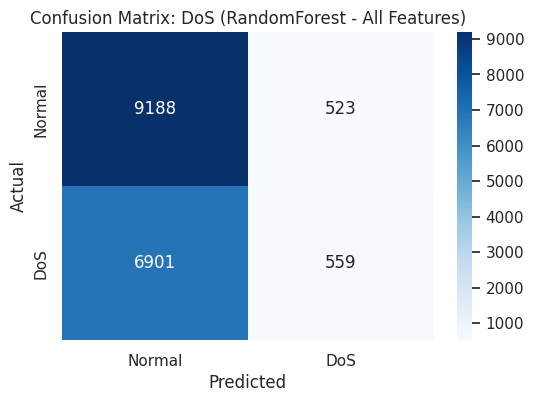

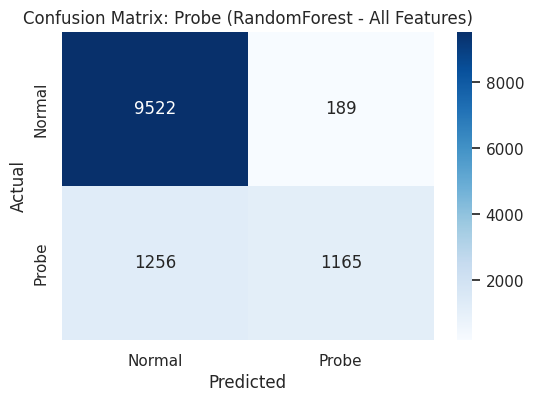

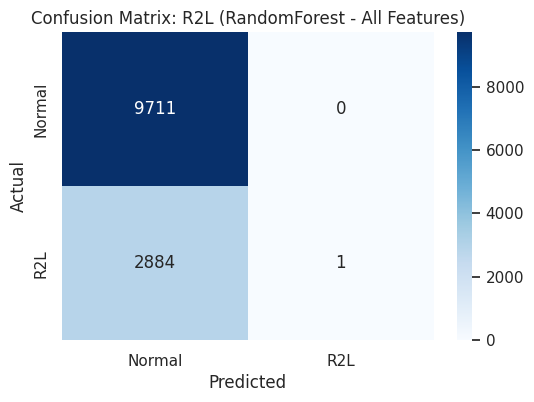

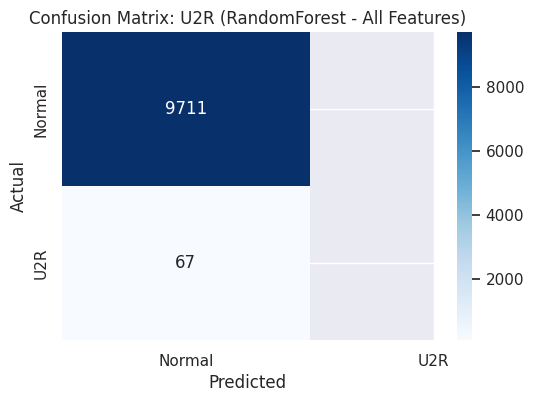

In [ ]:
# DoS - RF All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dos_rf_all, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.title('Confusion Matrix: DoS (RandomForest - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Probe - RF All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_probe_rf_all, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.title('Confusion Matrix: Probe (RandomForest - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# R2L - RF All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_r2l_rf_all, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.title('Confusion Matrix: R2L (RandomForest - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# U2R - RF All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_u2r_rf_all, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.title('Confusion Matrix: U2R (RandomForest - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Using 13 Features for each category**


Confusion Matrices

DoS

## Prepare Test Data with RFE Features
Select only the RFE-chosen features from the scaled test sets for each attack category. Includes comment: '# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.'.

In [ ]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
print(X_U2R_test2.shape)

(9778, 13)


## Generate Confusion Matrix (RFE Features) - DoS
Generate and display a confusion matrix for the DoS test set using the RandomForest classifier trained on RFE features. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# Create confusion matrix
cm_dos_rf_rfe = pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_dos_rf_rfe)

Predicted attacks     0     1
Actual attacks               
0                  9631    80
1                  4082  3378


**Probe**

## Generate Confusion Matrix (RFE Features) - Probe
Generate and display a confusion matrix for the Probe test set using the RandomForest classifier trained on RFE features. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# Create confusion matrix
cm_probe_rf_rfe = pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_probe_rf_rfe)

Predicted attacks     0     2
Actual attacks               
0                  9313   398
2                  1221  1200


**R2L**

## Generate Confusion Matrix (RFE Features) - R2L
Generate and display a confusion matrix for the R2L test set using the RandomForest classifier trained on RFE features. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# Create confusion matrix
cm_r2l_rf_rfe = pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_r2l_rf_rfe)

Predicted attacks     0
Actual attacks         
0                  9711
3                  2885


**U2R**

## Generate Confusion Matrix (RFE Features) - U2R
Generate and display a confusion matrix for the U2R test set using the RandomForest classifier trained on RFE features. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# Create confusion matrix
cm_u2r_rf_rfe = pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_u2r_rf_rfe)

Predicted attacks     0  4
Actual attacks            
0                  9710  1
4                    63  4


**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**


## Calculate Cross-Validation Scores (RFE Features) - DoS
Perform 10-fold cross-validation on the DoS RFE-feature test set using the corresponding RandomForest classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99691 (+/- 0.00281)
Precision: 0.99799 (+/- 0.00384)
Recall: 0.99491 (+/- 0.00506)
F-measure: 0.99644 (+/- 0.00324)


**Probe**

## Calculate Cross-Validation Scores (RFE Features) - Probe
Perform 10-fold cross-validation on the Probe RFE-feature test set using the corresponding RandomForest classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99275 (+/- 0.00465)
Precision: 0.99019 (+/- 0.00875)
Recall: 0.98710 (+/- 0.00860)
F-measure: 0.98861 (+/- 0.00728)


**R2L**

## Calculate Cross-Validation Scores (RFE Features) - R2L
Perform 10-fold cross-validation on the R2L RFE-feature test set using the corresponding RandomForest classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97721 (+/- 0.00853)
Precision: 0.97138 (+/- 0.01282)
Recall: 0.96378 (+/- 0.01382)
F-measure: 0.96748 (+/- 0.01219)


**U2R**

## Calculate Cross-Validation Scores (RFE Features) - U2R
Perform 10-fold cross-validation on the U2R RFE-feature test set using the corresponding RandomForest classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99703 (+/- 0.00250)
Precision: 0.95907 (+/- 0.10005)
Recall: 0.81527 (+/- 0.17464)
F-measure: 0.86626 (+/- 0.12065)


## Visualize Confusion Matrices (RFE Features - RandomForest)
Use Seaborn's heatmap function to visualize the confusion matrices generated for DoS, Probe, R2L, and U2R using the RandomForest classifiers trained on RFE-selected features (clf_rfeDoS, clf_rfeProbe, etc.).

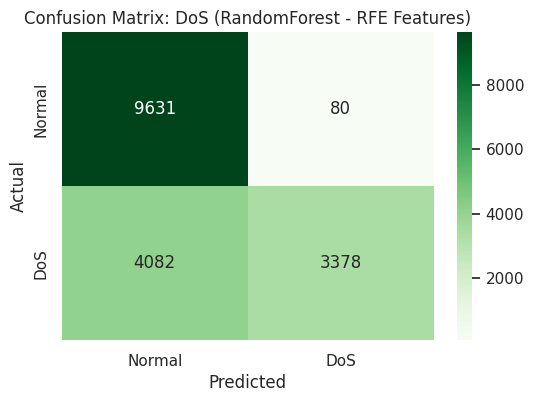

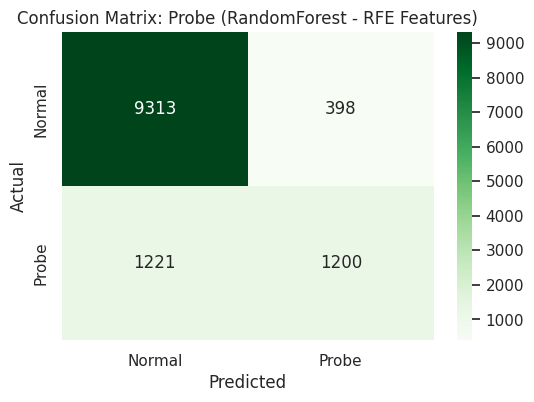

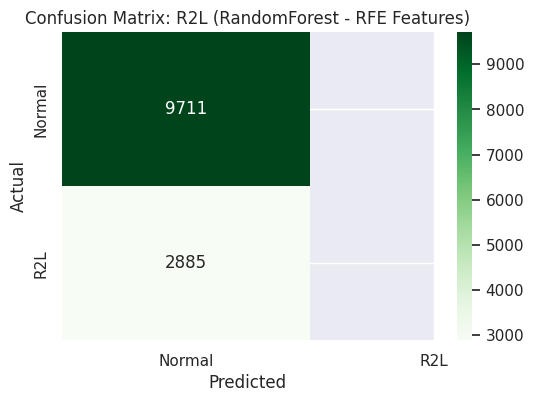

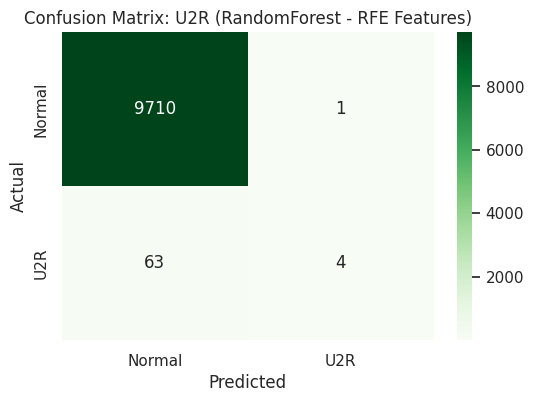

In [ ]:
# DoS - RF RFE Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dos_rf_rfe, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.title('Confusion Matrix: DoS (RandomForest - RFE Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Probe - RF RFE Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_probe_rf_rfe, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.title('Confusion Matrix: Probe (RandomForest - RFE Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# R2L - RF RFE Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_r2l_rf_rfe, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.title('Confusion Matrix: R2L (RandomForest - RFE Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# U2R - RF RFE Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_u2r_rf_rfe, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.title('Confusion Matrix: U2R (RandomForest - RFE Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# KNeighbors


## Train K-Nearest Neighbors (KNN) Classifiers
Import, initialize, and train KNeighborsClassifier models for each attack category (DoS, Probe, R2L, U2R) using all features.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN_DoS=KNeighborsClassifier()
clf_KNN_Probe=KNeighborsClassifier()
clf_KNN_R2L=KNeighborsClassifier()
clf_KNN_U2R=KNeighborsClassifier()

clf_KNN_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_KNN_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_KNN_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_KNN_U2R.fit(X_U2R, Y_U2R.astype(int))


KNeighborsClassifier()

 **DoS**

## Generate Confusion Matrix (KNN) - DoS
Generate and display a confusion matrix for the DoS test set using the KNN classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_DoS_pred_knn=clf_KNN_DoS.predict(X_DoS_test) # Store prediction

# Create confusion matrix
cm_dos_knn = pd.crosstab(Y_DoS_test, Y_DoS_pred_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_dos_knn)

Predicted attacks     0     1
Actual attacks               
0                  9422   289
1                  1573  5887


**Probe**

## Generate Confusion Matrix (KNN) - Probe
Generate and display a confusion matrix for the Probe test set using the KNN classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_Probe_pred_knn=clf_KNN_Probe.predict(X_Probe_test) # Store prediction
# Create confusion matrix

cm_probe_knn = pd.crosstab(Y_Probe_test, Y_Probe_pred_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_probe_knn)

Predicted attacks     0     2
Actual attacks               
0                  9437   274
2                  1272  1149


**R2L**

## Generate Confusion Matrix (KNN) - R2L
Generate and display a confusion matrix for the R2L test set using the KNN classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_R2L_pred_knn=clf_KNN_R2L.predict(X_R2L_test) # Store prediction
# Create confusion matrix
cm_r2l_knn = pd.crosstab(Y_R2L_test, Y_R2L_pred_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_r2l_knn)

Predicted attacks     0  3
Actual attacks            
0                  9706  5
3                  2883  2


**U2R**

## Generate Confusion Matrix (KNN) - U2R
Generate and display a confusion matrix for the U2R test set using the KNN classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_U2R_pred_knn=clf_KNN_U2R.predict(X_U2R_test) # Store prediction
# Create confusion matrix
cm_u2r_knn = pd.crosstab(Y_U2R_test, Y_U2R_pred_knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_u2r_knn)

Predicted attacks     0  4
Actual attacks            
0                  9711  0
4                    65  2


**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**

## Calculate Cross-Validation Scores (KNN) - DoS
Perform 10-fold cross-validation on the DoS test set using the KNN classifier and print evaluation metrics.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99715 (+/- 0.00278)
Precision: 0.99678 (+/- 0.00383)
Recall: 0.99665 (+/- 0.00344)
F-measure: 0.99672 (+/- 0.00320)


**Probe**

## Calculate Cross-Validation Scores (KNN) - Probe
Perform 10-fold cross-validation on the Probe test set using the KNN classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99077 (+/- 0.00403)
Precision: 0.98606 (+/- 0.00675)
Recall: 0.98508 (+/- 0.01137)
F-measure: 0.98553 (+/- 0.00645)


**R2L**

## Calculate Cross-Validation Scores (KNN) - R2L
Perform 10-fold cross-validation on the R2L test set using the KNN classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.96729 (+/- 0.00727)
Precision: 0.95304 (+/- 0.01240)
Recall: 0.95467 (+/- 0.01351)
F-measure: 0.95377 (+/- 0.01030)


**U2R**

## Calculate Cross-Validation Scores (KNN) - U2R
Perform 10-fold cross-validation on the U2R test set using the KNN classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99703 (+/- 0.00281)
Precision: 0.93143 (+/- 0.14679)
Recall: 0.85073 (+/- 0.17639)
F-measure: 0.87831 (+/- 0.11390)


## Visualize Confusion Matrices (All Features - KNN)
Use Seaborn's heatmap function to visualize the confusion matrices generated for DoS, Probe, R2L, and U2R using the KNN classifiers trained on all features (clf_KNN_DoS, clf_KNN_Probe, etc.).

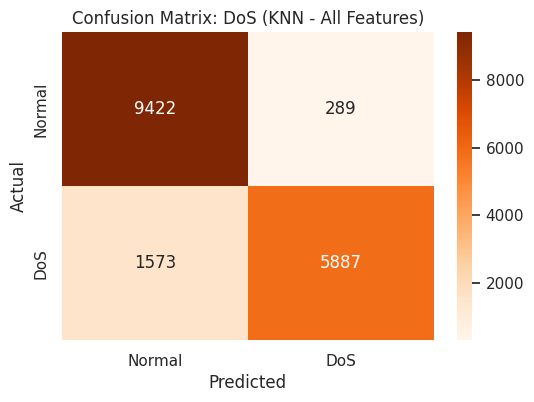

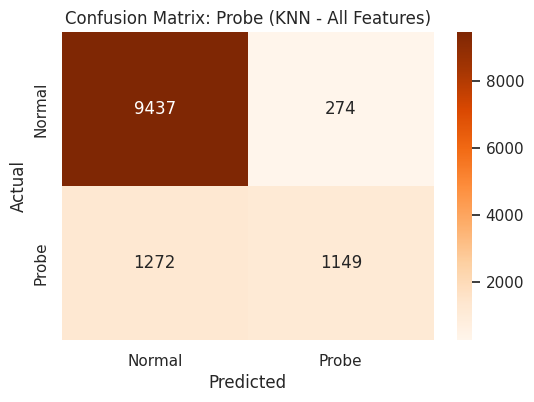

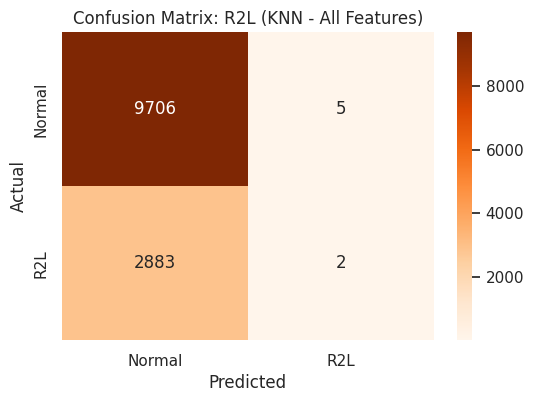

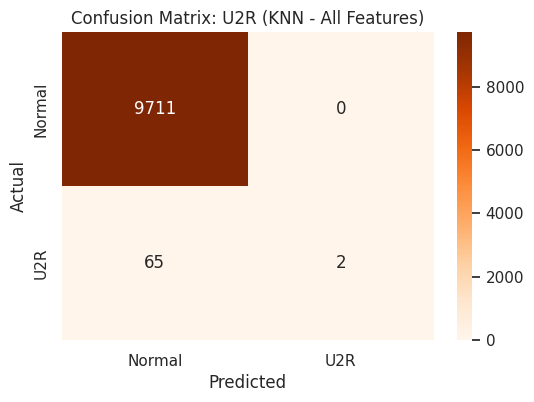

In [ ]:
# DoS - KNN All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dos_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.title('Confusion Matrix: DoS (KNN - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Probe - KNN All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_probe_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.title('Confusion Matrix: Probe (KNN - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# R2L - KNN All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_r2l_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.title('Confusion Matrix: R2L (KNN - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# U2R - KNN All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_u2r_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.title('Confusion Matrix: U2R (KNN - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# SVM


## Train Support Vector Machine (SVM) Classifiers
Import, initialize (with linear kernel), and train SVC models for each attack category using all features.

In [ ]:
from sklearn.svm import SVC

clf_SVM_DoS=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Probe=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_R2L=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_U2R=SVC(kernel='linear', C=1.0, random_state=0)

clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))

SVC(kernel='linear', random_state=0)

**DoS**

## Generate Confusion Matrix (SVM) - DoS
Generate and display a confusion matrix for the DoS test set using the SVM classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_DoS_pred_svm=clf_SVM_DoS.predict(X_DoS_test) # Store prediction

# Create confusion matrix
cm_dos_svm = pd.crosstab(Y_DoS_test, Y_DoS_pred_svm, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_dos_svm)

Predicted attacks     0     1
Actual attacks               
0                  9455   256
1                  1359  6101


## Generate Confusion Matrix (SVM) - Probe
Generate and display a confusion matrix for the Probe test set using the SVM classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_Probe_pred_svm=clf_SVM_Probe.predict(X_Probe_test) # Store prediction
# Create confusion matrix

cm_probe_svm = pd.crosstab(Y_Probe_test, Y_Probe_pred_svm, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_probe_svm)

Predicted attacks     0     2
Actual attacks               
0                  9576   135
2                  1285  1136


## Generate Confusion Matrix (SVM) - R2L
Generate and display a confusion matrix for the R2L test set using the SVM classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_R2L_pred_svm=clf_SVM_R2L.predict(X_R2L_test) # Store prediction
# Create confusion matrix
cm_r2l_svm = pd.crosstab(Y_R2L_test, Y_R2L_pred_svm, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_r2l_svm)

Predicted attacks     0    3
Actual attacks              
0                  9639   72
3                  2737  148


## Generate Confusion Matrix (SVM) - U2R
Generate and display a confusion matrix for the U2R test set using the SVM classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_U2R_pred_svm=clf_SVM_U2R.predict(X_U2R_test) # Store prediction
# Create confusion matrix
cm_u2r_svm = pd.crosstab(Y_U2R_test, Y_U2R_pred_svm, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_u2r_svm)

Predicted attacks     0  4
Actual attacks            
0                  9710  1
4                    67  0


**Cross Validation: Accuracy, Precision, Recall, F-measure (SVM)**

**DoS**

## Calculate Cross-Validation Scores (SVM) - DoS
Perform 10-fold cross-validation on the DoS test set using the SVM classifier and print evaluation metrics.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99371 (+/- 0.00375)
Precision: 0.99107 (+/- 0.00785)
Recall: 0.99450 (+/- 0.00388)
F-measure: 0.99278 (+/- 0.00428)


**Probe**

## Calculate Cross-Validation Scores (SVM) - Probe
Perform 10-fold cross-validation on the Probe test set using the SVM classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.98450 (+/- 0.00526)
Precision: 0.96907 (+/- 0.01031)
Recall: 0.98365 (+/- 0.00686)
F-measure: 0.97613 (+/- 0.00800)


**R2L**

## Calculate Cross-Validation Scores (SVM) - R2L
Perform 10-fold cross-validation on the R2L test set using the SVM classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.96793 (+/- 0.00738)
Precision: 0.94854 (+/- 0.00994)
Recall: 0.96264 (+/- 0.01388)
F-measure: 0.95529 (+/- 0.01048)


**U2R**

## Calculate Cross-Validation Scores (SVM) - U2R
Perform 10-fold cross-validation on the U2R test set using the SVM classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99632 (+/- 0.00390)
Precision: 0.91056 (+/- 0.17934)
Recall: 0.82909 (+/- 0.21833)
F-measure: 0.84869 (+/- 0.16029)


## Visualize Confusion Matrices (All Features - SVM)
Use Seaborn's heatmap function to visualize the confusion matrices generated for DoS, Probe, R2L, and U2R using the SVM classifiers trained on all features (clf_SVM_DoS, clf_SVM_Probe, etc.).

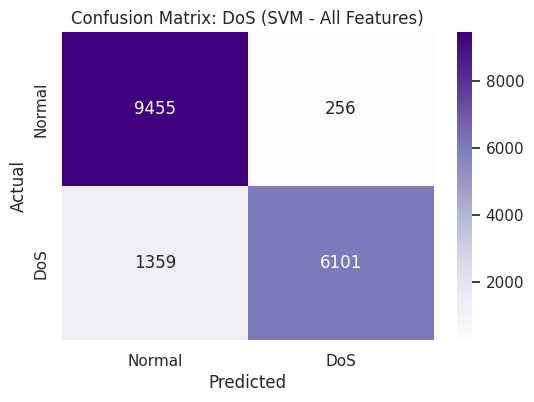

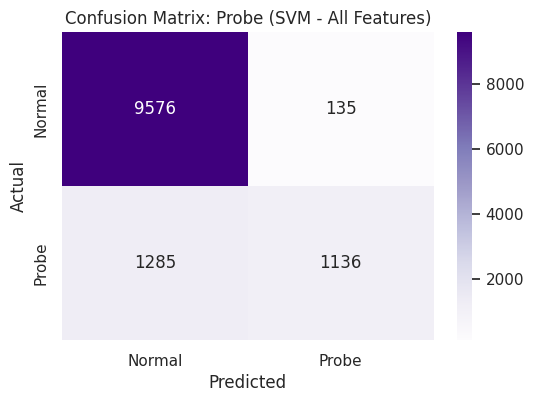

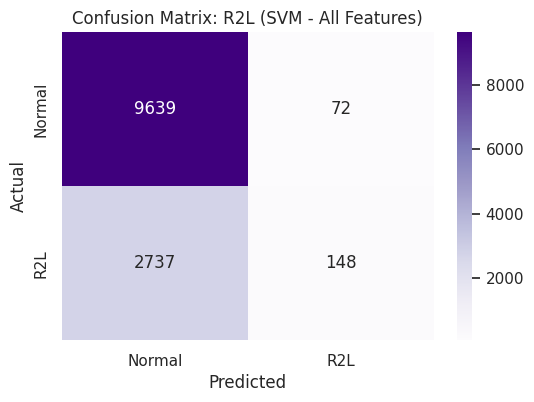

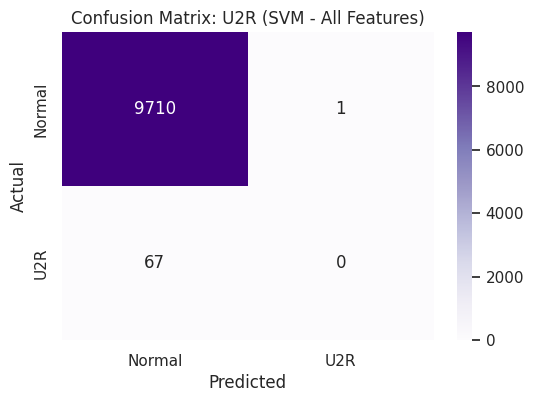

In [ ]:
# DoS - SVM All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dos_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.title('Confusion Matrix: DoS (SVM - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Probe - SVM All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_probe_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.title('Confusion Matrix: Probe (SVM - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# R2L - SVM All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_r2l_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.title('Confusion Matrix: R2L (SVM - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# U2R - SVM All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_u2r_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.title('Confusion Matrix: U2R (SVM - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifiers (All Features)
clf_DT_DoS = DecisionTreeClassifier(random_state=0)
clf_DT_Probe = DecisionTreeClassifier(random_state=0)
clf_DT_R2L = DecisionTreeClassifier(random_state=0)
clf_DT_U2R = DecisionTreeClassifier(random_state=0)

clf_DT_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_DT_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_DT_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_DT_U2R.fit(X_U2R, Y_U2R.astype(int))

DecisionTreeClassifier(random_state=0)



**Confusion Matrices (Decision Tree)**

**DoS**

In [ ]:

Y_DoS_pred_dt = clf_DT_DoS.predict(X_DoS_test)
# Create confusion matrix
cm_dos_dt = pd.crosstab(Y_DoS_test, Y_DoS_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_dos_dt)

Predicted attacks     0     1
Actual attacks               
0                  9499   212
1                  2830  4630


In [ ]:

# Y_DoS_pred_dt = clf_DT_DoS.predict(X_DoS_test) # Already done above
# Create confusion matrix
# pd.crosstab(Y_DoS_test, Y_DoS_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks']) # Already printed above
# This cell seems redundant, keeping the first instance (57db8a95)



**Probe**

In [ ]:


Y_Probe_pred_dt = clf_DT_Probe.predict(X_Probe_test)
# Create confusion matrix
cm_probe_dt = pd.crosstab(Y_Probe_test, Y_Probe_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_probe_dt)

Predicted attacks     0     2
Actual attacks               
0                  2337  7374
2                   212  2209




**R2L**

In [ ]:


Y_R2L_pred_dt = clf_DT_R2L.predict(X_R2L_test)
# Create confusion matrix
cm_r2l_dt = pd.crosstab(Y_R2L_test, Y_R2L_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_r2l_dt)

Predicted attacks     0    3
Actual attacks              
0                  9707    4
3                  2573  312




**U2R**

In [ ]:


Y_U2R_pred_dt = clf_DT_U2R.predict(X_U2R_test)
# Create confusion matrix
cm_u2r_dt = pd.crosstab(Y_U2R_test, Y_U2R_pred_dt, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_u2r_dt)

Predicted attacks     0  4
Actual attacks            
0                  9703  8
4                    60  7




**Cross Validation: Accuracy, Precision, Recall, F-measure (Decision Tree)**

**DoS**

In [ ]:
# ... existing code ...

accuracy = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99639 (+/- 0.00341)
Precision: 0.99505 (+/- 0.00477)
Recall: 0.99665 (+/- 0.00483)
F-measure: 0.99585 (+/- 0.00392)




**Probe**

In [ ]:
# ... existing code ...

accuracy = cross_val_score(clf_DT_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DT_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DT_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DT_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99571 (+/- 0.00328)
Precision: 0.99392 (+/- 0.00684)
Recall: 0.99267 (+/- 0.00405)
F-measure: 0.99329 (+/- 0.00512)




**R2L**

In [ ]:
cv_folds = 10

accuracy = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=cv_folds, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=cv_folds, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=cv_folds, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=cv_folds, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97920 (+/- 0.01053)
Precision: 0.97151 (+/- 0.01736)
Recall: 0.96958 (+/- 0.01379)
F-measure: 0.97051 (+/- 0.01478)




**U2R**

In [ ]:

print(f"Running {cv_folds}-fold CV for Decision Tree U2R...")
accuracy = cross_val_score(clf_DT_U2R, X_U2R_test, Y_U2R_test, cv=cv_folds, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DT_U2R, X_U2R_test, Y_U2R_test, cv=cv_folds, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DT_U2R, X_U2R_test, Y_U2R_test, cv=cv_folds, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DT_U2R, X_U2R_test, Y_U2R_test, cv=cv_folds, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Running 10-fold CV for Decision Tree U2R...
Accuracy: 0.99652 (+/- 0.00228)
Precision: 0.86295 (+/- 0.08961)
Recall: 0.90958 (+/- 0.09211)
F-measure: 0.88210 (+/- 0.06559)


## Visualize Confusion Matrices (All Features - Decision Tree)
Use Seaborn's heatmap function to visualize the confusion matrices generated for DoS, Probe, R2L, and U2R using the Decision Tree classifiers trained on all features (clf_DT_DoS, clf_DT_Probe, etc.).

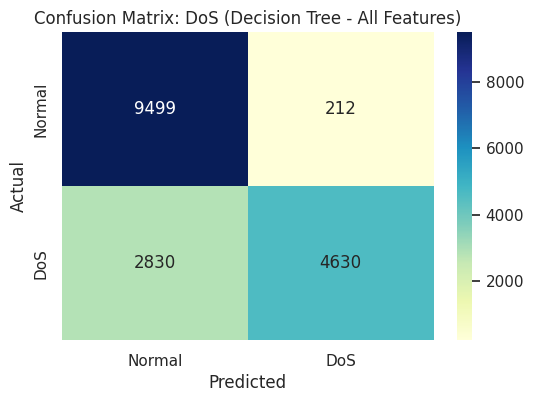

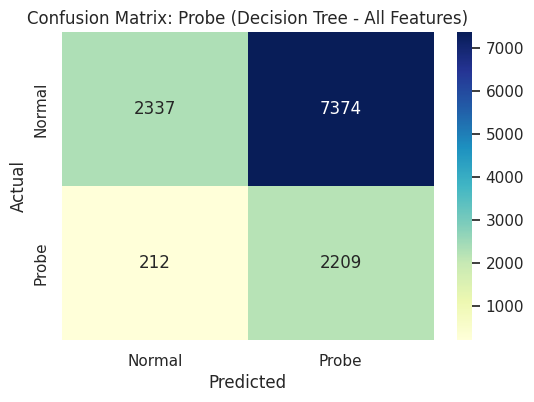

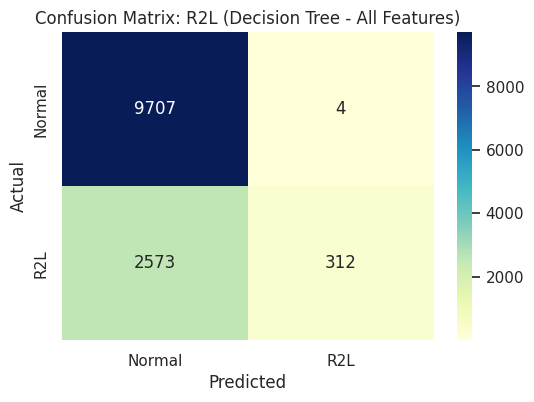

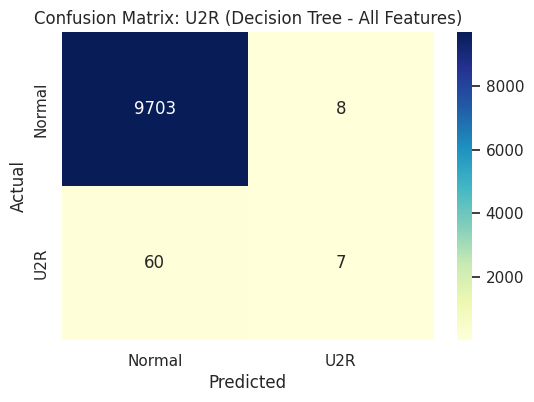

In [ ]:
# DoS - DT All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dos_dt, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.title('Confusion Matrix: DoS (Decision Tree - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Probe - DT All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_probe_dt, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.title('Confusion Matrix: Probe (Decision Tree - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# R2L - DT All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_r2l_dt, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.title('Confusion Matrix: R2L (Decision Tree - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# U2R - DT All Features
plt.figure(figsize=(6, 4))
sns.heatmap(cm_u2r_dt, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.title('Confusion Matrix: U2R (Decision Tree - All Features)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Ensemble Learning

## Train Ensemble (Voting) Classifiers
Import VotingClassifier. Create and train ensemble models (using RandomForest, KNN, SVM with hard voting) for each attack category using all features.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensure base estimators are defined and trained (they are from previous cells)
# clf_DoS, clf_KNN_DoS, clf_SVM_DoS, etc.

clf_voting_DoS = VotingClassifier(estimators=[('rf', clf_DoS), ('knn', clf_KNN_DoS), ('svm', clf_SVM_DoS)], voting='hard')
clf_voting_Probe = VotingClassifier(estimators=[('rf', clf_Probe), ('knn', clf_KNN_Probe), ('svm', clf_SVM_Probe)], voting='hard')
clf_voting_R2L = VotingClassifier(estimators=[('rf', clf_R2L), ('knn', clf_KNN_R2L), ('svm', clf_SVM_R2L)], voting='hard')
clf_voting_U2R = VotingClassifier(estimators=[('rf', clf_U2R), ('knn', clf_KNN_U2R), ('svm', clf_SVM_U2R)], voting='hard')

clf_voting_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_voting_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_voting_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_voting_U2R.fit(X_U2R, Y_U2R.astype(int))


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10, n_jobs=2,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('svm', SVC(kernel='linear', random_state=0))])

**DoS**

## Generate Confusion Matrix (Voting) - DoS
Generate and display a confusion matrix for the DoS test set using the Voting classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_DoS_pred_voting=clf_voting_DoS.predict(X_DoS_test) # Store prediction

# Create confusion matrix
cm_dos_voting = pd.crosstab(Y_DoS_test, Y_DoS_pred_voting, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_dos_voting)

Predicted attacks     0     1
Actual attacks               
0                  9602   109
1                  1784  5676


**Probe**

## Generate Confusion Matrix (Voting) - Probe
Generate and display a confusion matrix for the Probe test set using the Voting classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_Probe_pred_voting=clf_voting_Probe.predict(X_Probe_test) # Store prediction

# Create confusion matrix
cm_probe_voting = pd.crosstab(Y_Probe_test, Y_Probe_pred_voting, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_probe_voting)

Predicted attacks     0     2
Actual attacks               
0                  9534   177
2                  1170  1251


**R2L**

## Generate Confusion Matrix (Voting) - R2L
Generate and display a confusion matrix for the R2L test set using the Voting classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_R2L_pred_voting=clf_voting_R2L.predict(X_R2L_test) # Store prediction

# Create confusion matrix
cm_r2l_voting = pd.crosstab(Y_R2L_test, Y_R2L_pred_voting, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_r2l_voting)

Predicted attacks     0  3
Actual attacks            
0                  9711  0
3                  2884  1


**U2R**

## Generate Confusion Matrix (Voting) - U2R
Generate and display a confusion matrix for the U2R test set using the Voting classifier. Includes comment: '# Create confusion matrix'.

In [ ]:
Y_U2R_pred_voting=clf_voting_U2R.predict(X_U2R_test) # Store prediction

# Create confusion matrix
cm_u2r_voting = pd.crosstab(Y_U2R_test, Y_U2R_pred_voting, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(cm_u2r_voting)

Predicted attacks     0
Actual attacks         
0                  9711
4                    67


**Cross Validation: Accuracy, Precision, Recall, F-measure (Voting)**

**DoS**

## Calculate Cross-Validation Scores (Voting) - DoS
Perform 10-fold cross-validation on the DoS test set using the Voting classifier and print evaluation metrics.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99790 (+/- 0.00210)
Precision: 0.99826 (+/- 0.00241)
Recall: 0.99692 (+/- 0.00318)
F-measure: 0.99759 (+/- 0.00242)


**Probe**

## Calculate Cross-Validation Scores (Voting) - Probe
Perform 10-fold cross-validation on the Probe test set using the Voting classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-mesaure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99250 (+/- 0.00341)
Precision: 0.98749 (+/- 0.00717)
Recall: 0.98911 (+/- 0.00675)
F-mesaure: 0.98828 (+/- 0.00535)


**R2L**

## Calculate Cross-Validation Scores (Voting) - R2L
Perform 10-fold cross-validation on the R2L test set using the Voting classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97229 (+/- 0.00552)
Precision: 0.95850 (+/- 0.00839)
Recall: 0.96364 (+/- 0.01170)
F-measure: 0.96099 (+/- 0.00790)


**U2R**

## Calculate Cross-Validation Scores (Voting) - U2R
Perform 10-fold cross-validation on the U2R test set using the Voting classifier and print evaluation metrics.

In [ ]:
accuracy = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99734 (+/- 0.00262)
Precision: 0.94151 (+/- 0.12989)
Recall: 0.87335 (+/- 0.18397)
F-measure: 0.89201 (+/- 0.11758)


## Visualize Confusion Matrices (Voting Classifier)
Use Seaborn's heatmap function to visualize the confusion matrices generated for DoS, Probe, R2L, and U2R using the Voting classifiers (clf_voting_DoS, clf_voting_Probe, etc.).

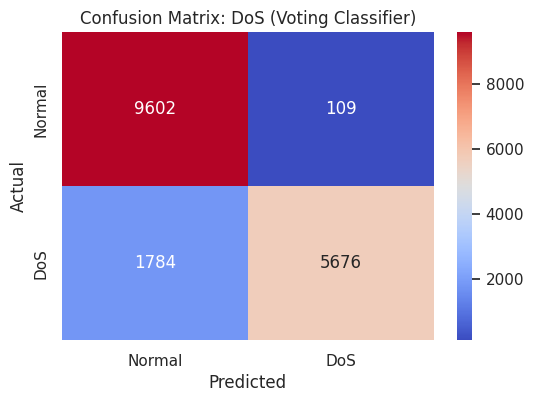

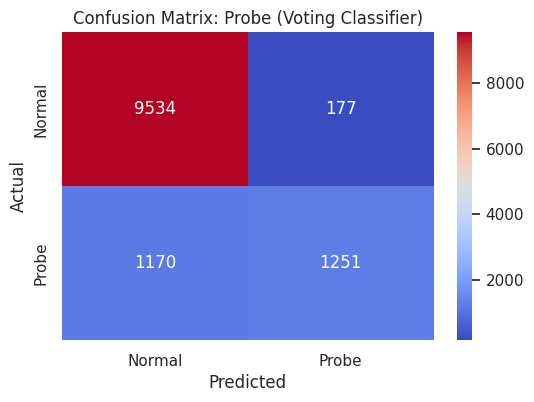

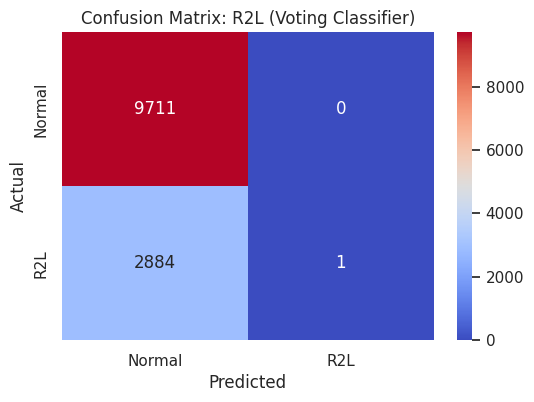

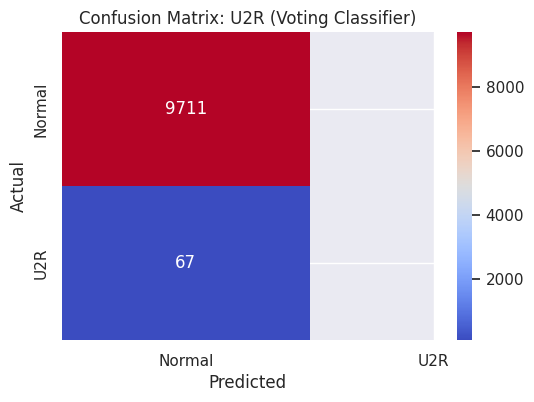

In [ ]:
# DoS - Voting Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dos_voting, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.title('Confusion Matrix: DoS (Voting Classifier)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Probe - Voting Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(cm_probe_voting, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.title('Confusion Matrix: Probe (Voting Classifier)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# R2L - Voting Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(cm_r2l_voting, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.title('Confusion Matrix: R2L (Voting Classifier)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# U2R - Voting Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(cm_u2r_voting, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.title('Confusion Matrix: U2R (Voting Classifier)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Compare Model Performance (Setup)
Collect the mean scores from the cross-validation results for all models (RandomForest All, RandomForest RFE, KNN, SVM, Decision Tree, Voting) for each attack category. This involves re-running the cross-validation for each model and metric and storing the results in a DataFrame.

In [ ]:
# Define models and data splits
models = {
    'RF_All': {'DoS': clf_DoS, 'Probe': clf_Probe, 'R2L': clf_R2L, 'U2R': clf_U2R},
    'RF_RFE': {'DoS': clf_rfeDoS, 'Probe': clf_rfeProbe, 'R2L': clf_rfeR2L, 'U2R': clf_rfeU2R},
    'KNN': {'DoS': clf_KNN_DoS, 'Probe': clf_KNN_Probe, 'R2L': clf_KNN_R2L, 'U2R': clf_KNN_U2R},
    'SVM': {'DoS': clf_SVM_DoS, 'Probe': clf_SVM_Probe, 'R2L': clf_SVM_R2L, 'U2R': clf_SVM_U2R},
    'DT': {'DoS': clf_DT_DoS, 'Probe': clf_DT_Probe, 'R2L': clf_DT_R2L, 'U2R': clf_DT_U2R},
    'Voting': {'DoS': clf_voting_DoS, 'Probe': clf_voting_Probe, 'R2L': clf_voting_R2L, 'U2R': clf_voting_U2R}
}

X_test_data = {
    'RF_All': {'DoS': X_DoS_test, 'Probe': X_Probe_test, 'R2L': X_R2L_test, 'U2R': X_U2R_test},
    'RF_RFE': {'DoS': X_DoS_test2, 'Probe': X_Probe_test2, 'R2L': X_R2L_test2, 'U2R': X_U2R_test2},
    'KNN': {'DoS': X_DoS_test, 'Probe': X_Probe_test, 'R2L': X_R2L_test, 'U2R': X_U2R_test},
    'SVM': {'DoS': X_DoS_test, 'Probe': X_Probe_test, 'R2L': X_R2L_test, 'U2R': X_U2R_test},
    'DT': {'DoS': X_DoS_test, 'Probe': X_Probe_test, 'R2L': X_R2L_test, 'U2R': X_U2R_test},
    'Voting': {'DoS': X_DoS_test, 'Probe': X_Probe_test, 'R2L': X_R2L_test, 'U2R': X_U2R_test}
}

Y_test_data = {
    'DoS': Y_DoS_test, 'Probe': Y_Probe_test, 'R2L': Y_R2L_test, 'U2R': Y_U2R_test
}

attack_types = ['DoS', 'Probe', 'R2L', 'U2R']
metrics_to_score = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
# Adjust scoring for DoS (binary-like) if needed, e.g., precision, recall, f1 instead of _macro
scoring_map = {
    'DoS': {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'},
    'Probe': {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro'},
    'R2L': {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro'},
    'U2R': {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro'}
}


results = []

for model_name, model_dict in models.items():
    for attack in attack_types:
        clf = model_dict[attack]
        X_test = X_test_data[model_name][attack]
        Y_test = Y_test_data[attack]

        current_scores = {'Model': model_name, 'AttackType': attack}

        # Use appropriate scoring based on attack type
        attack_scoring = scoring_map[attack]

        try:
            acc = cross_val_score(clf, X_test, Y_test, cv=10, scoring=attack_scoring['accuracy']).mean()
            current_scores['Accuracy'] = acc
        except Exception as e:
            print(f"Error scoring Accuracy for {model_name} - {attack}: {e}")
            current_scores['Accuracy'] = np.nan

        try:
            pre = cross_val_score(clf, X_test, Y_test, cv=10, scoring=attack_scoring['precision']).mean()
            current_scores['Precision'] = pre
        except Exception as e:
            print(f"Error scoring Precision for {model_name} - {attack}: {e}")
            current_scores['Precision'] = np.nan

        try:
            rec = cross_val_score(clf, X_test, Y_test, cv=10, scoring=attack_scoring['recall']).mean()
            current_scores['Recall'] = rec
        except Exception as e:
            print(f"Error scoring Recall for {model_name} - {attack}: {e}")
            current_scores['Recall'] = np.nan

        try:
            f1 = cross_val_score(clf, X_test, Y_test, cv=10, scoring=attack_scoring['f1']).mean()
            current_scores['F-measure'] = f1
        except Exception as e:
            print(f"Error scoring F1 for {model_name} - {attack}: {e}")
            current_scores['F-measure'] = np.nan

        results.append(current_scores)

results_df = pd.DataFrame(results)
print("Collected Performance Metrics:")
print(results_df)

Collected Performance Metrics:
     Model AttackType  Accuracy  Precision    Recall  F-measure
0   RF_All        DoS  0.998195   0.999194  0.996649   0.997918
1   RF_All      Probe  0.995961   0.995918  0.991430   0.993649
2   RF_All        R2L  0.980391   0.974817  0.969673   0.972184
3   RF_All        U2R  0.996727   0.933291  0.822207   0.856389
4   RF_RFE        DoS  0.996913   0.997987  0.994906   0.996442
5   RF_RFE      Probe  0.992746   0.990189  0.987097   0.988612
6   RF_RFE        R2L  0.977215   0.971376  0.963784   0.967477
7   RF_RFE        U2R  0.997034   0.959073  0.815270   0.866259
8      KNN        DoS  0.997146   0.996784  0.996649   0.996716
9      KNN      Probe  0.990768   0.986059  0.985085   0.985526
10     KNN        R2L  0.967291   0.953037  0.954667   0.953774
11     KNN        U2R  0.997034   0.931433  0.850727   0.878314
12     SVM        DoS  0.993710   0.991066  0.994504   0.992777
13     SVM      Probe  0.984504   0.969072  0.983654   0.976130
14     SV

## Compare Model Performance (Accuracy)
Create grouped bar charts to compare the accuracy of different models for each category.

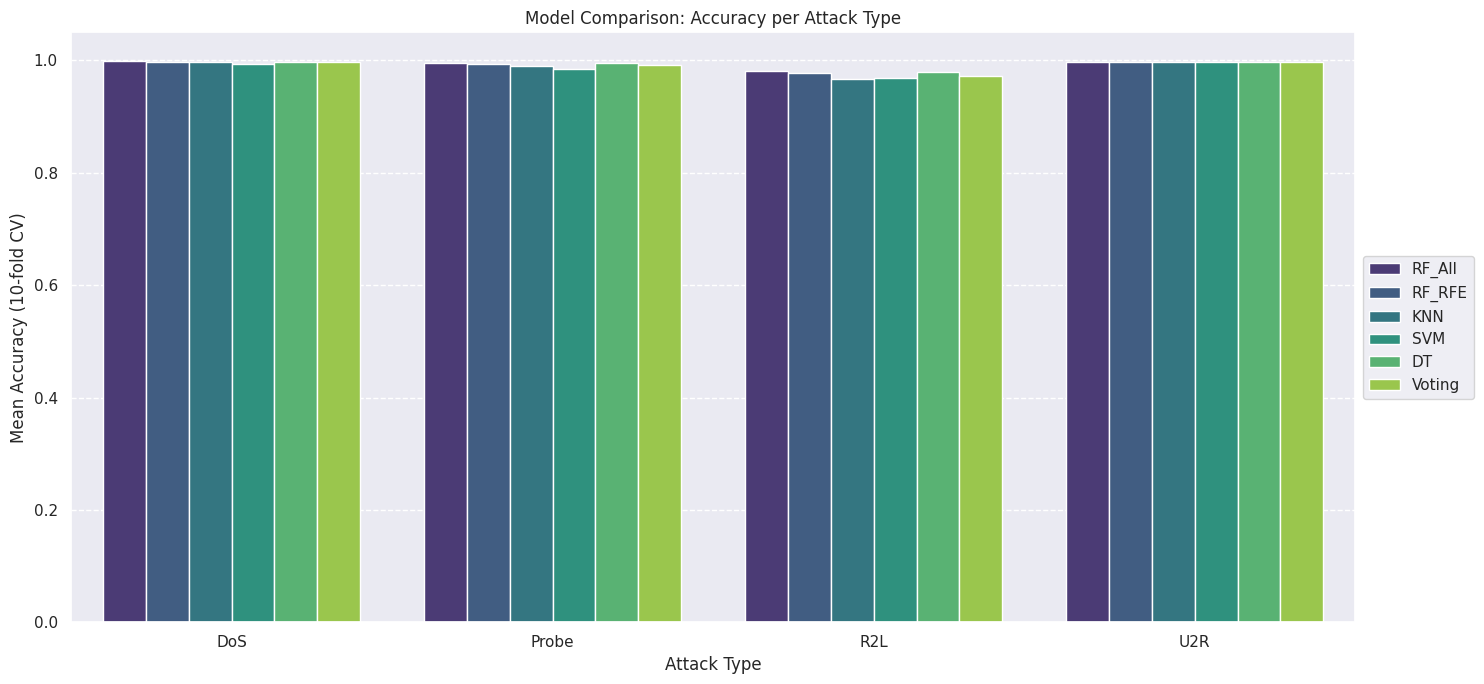

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x='AttackType', y='Accuracy', hue='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: Accuracy per Attack Type')
plt.ylabel('Mean Accuracy (10-fold CV)')
plt.xlabel('Attack Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1.05) # Set y-axis limits for better comparison
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Compare Model Performance (Precision)
Collect the mean precision scores from the cross-validation results for all models and categories. Create grouped bar charts to compare the precision.

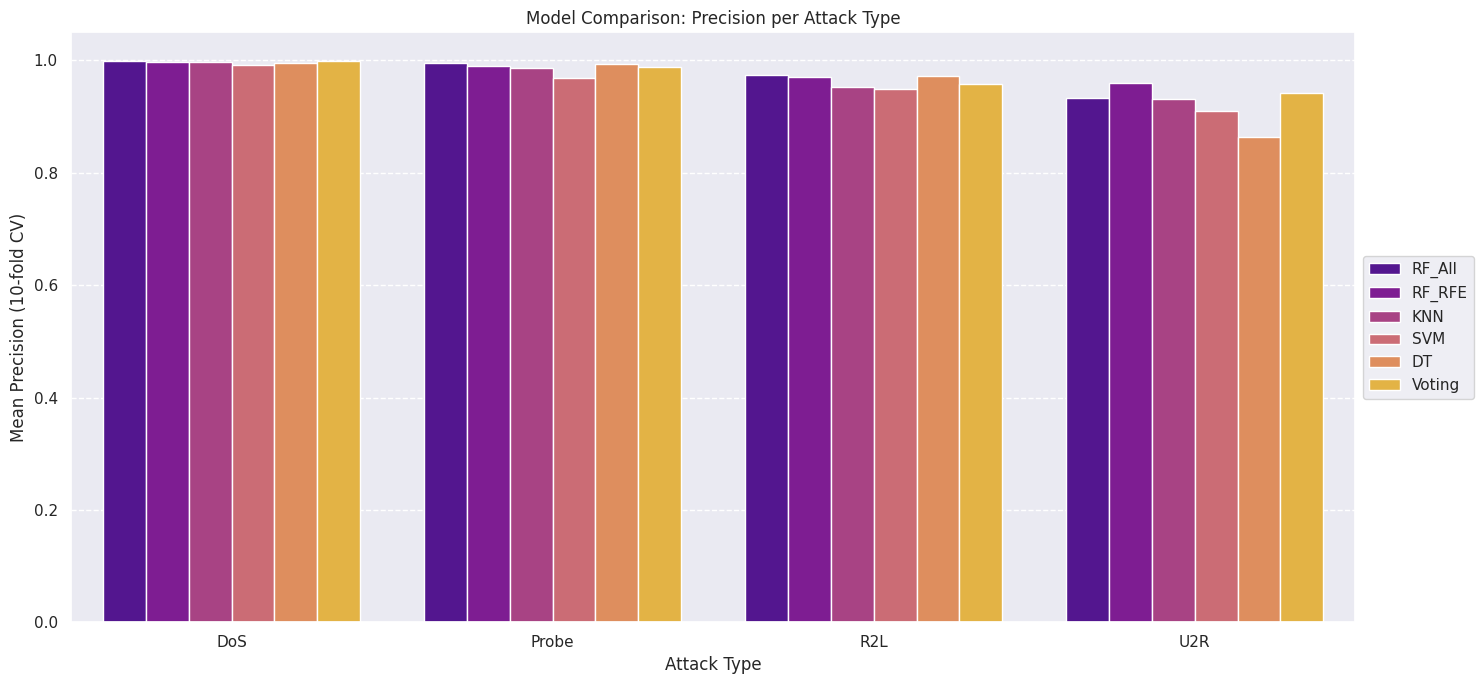

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x='AttackType', y='Precision', hue='Model', data=results_df, palette='plasma')
plt.title('Model Comparison: Precision per Attack Type')
plt.ylabel('Mean Precision (10-fold CV)')
plt.xlabel('Attack Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1.05) # Set y-axis limits
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Compare Model Performance (Recall)
Collect the mean recall scores from the cross-validation results for all models and categories. Create grouped bar charts to compare the recall.

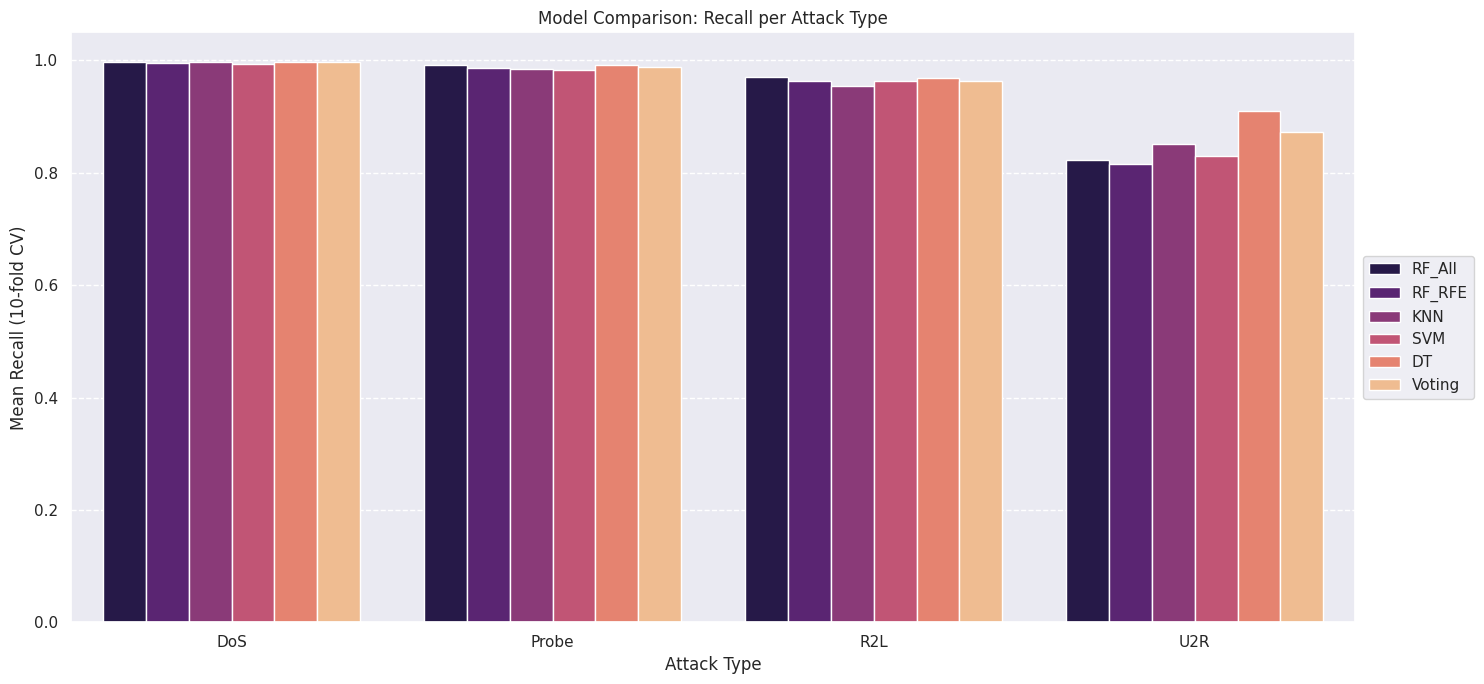

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x='AttackType', y='Recall', hue='Model', data=results_df, palette='magma')
plt.title('Model Comparison: Recall per Attack Type')
plt.ylabel('Mean Recall (10-fold CV)')
plt.xlabel('Attack Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1.05) # Set y-axis limits
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Compare Model Performance (F-measure)
Collect the mean F-measure scores from the cross-validation results for all models and categories. Create grouped bar charts to compare the F-measure.

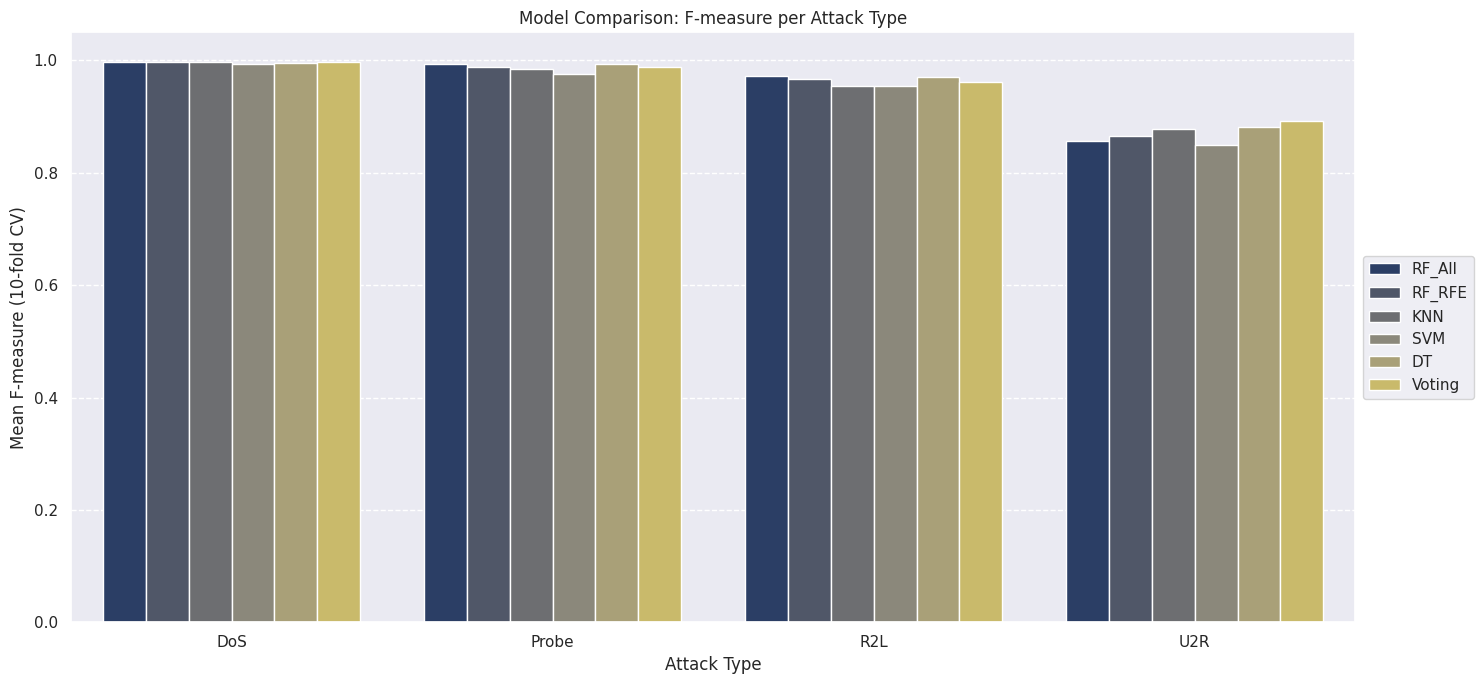

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x='AttackType', y='F-measure', hue='Model', data=results_df, palette='cividis')
plt.title('Model Comparison: F-measure per Attack Type')
plt.ylabel('Mean F-measure (10-fold CV)')
plt.xlabel('Attack Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1.05) # Set y-axis limits
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Download the Models**

In [ ]:
import joblib
import os

os.makedirs('models', exist_ok=True)

joblib.dump(clf_voting_DoS, 'models/voting_classifier_dos.pkl')
joblib.dump(clf_voting_Probe, 'models/voting_classifier_probe.pkl')
joblib.dump(clf_voting_R2L, 'models/voting_classifier_r2l.pkl')
joblib.dump(clf_voting_U2R, 'models/voting_classifier_u2r.pkl')

joblib.dump(scaler1, 'models/scaler_dos.pkl')
joblib.dump(scaler2, 'models/scaler_probe.pkl')
joblib.dump(scaler3, 'models/scaler_r2l.pkl')
joblib.dump(scaler4, 'models/scaler_u2r.pkl')

joblib.dump(col_names, 'models/column_names.pkl')


['models/column_names.pkl']